### Create SVM class with fit, predict, visualise

In [70]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1: 'r', -1: 'b'}
        if self.visualization:
            self.fig = plt.figure()
            # https://stackoverflow.com/a/3584933/13944490
            # 1x1 grid, first subplot
            self.ax = self.fig.add_subplot(1, 1, 1)
        # think self.data is needed here for visualise method to work
        self.data = {}
        # unsures if self.w and self.b do anything here, had hoped they fixed the visualise method for new predictions
        self.w = 0
        self.b = 0
            
    def fit(self, data):
        # pass in a dictionary of -1 and 1 examples
        self.data = data
        # { ||w|| : [w, b] } dictionary. As we step down w vector, find the largest b that satisfies
        # then choose lowest key value of ||w||
        opt_dict = {}
        
        transforms = [[1, 1],
                     [-1, 1],
                     [-1, -1],
                     [1, -1]]
        
        # find values to work with for ranges in the training dataset
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        # no need to keep in memory
        all_data = None
        
        # take big steps at first, then step down
        # you will know you have good w and b values when in both +ve and -ve classes yi(xi.w + b) is close to 1
        step_sizes = [self.max_feature_value * 0.1,
                     self.max_feature_value * 0.01,
                     # point of expense:
                     self.max_feature_value * 0.001,
                     ] 
        
        # b doesn't need as precise steps as w
        b_range_multiple = 5
        b_multiple = 5
        
        latest_optimum = self.max_feature_value * 10
        
        for step in step_sizes:
            # having w be same dimension is an additional constraint in this manual implementation
            # will give non optimal boundaries, SVM of only 45 degree angles
            w = np.array([latest_optimum, latest_optimum])
            optimized = False
            while not optimized:
                for b in np.arange(-1 * (self.max_feature_value * b_range_multiple),
                                  self.max_feature_value * b_range_multiple,
                                  step * b_multiple):
                    for transformation in transforms:
                        w_t = w * transformation
                        found_option = True
                        # weakest link in SVM fundamentally, have to run this calc on all data
                        # checking if yi(xi.w + b) >= 1 
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i 
                                if not yi * (np.dot(w_t, xi) + b) >= 1:
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                
                if w[0] < 0:
                    optimized = True
                    print("Optimized a step.")
                else:
                    w = w - [step, step]
            
            # sorted list of all magnitudes found for the options
            norms = sorted([n for n in opt_dict])
            # { ||w|| : [w, b] } dictionary to get the w and b values
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            
            latest_optimum = opt_choice[0][0] + step * 2
        
#         # check values
#         for i in self.data:
#             for xi in self.data[i]:
#                 yi = i
#                 print(xi, ':', yi * (np.dot(self.w, xi) + self.b))        
    
    def predict(self, features):
        # get sign of x . w + b
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker="*", c=self.colors[classification])
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in self.data[i]] for i in self.data]
        
        # hyperplane = x.w + b For example v = x.w + b
        # +ve v = 1; -ve v = -1; decision boundary = 0
        # just for human visualisation sake
        # x, y is unknown point on hyperplane
        # x_v and w_v are vectors
        # x_v = [x, y]
        # [x, y].w_v + b = 1 for +ve examples
        # x.w[0] + y.w[1] + b = 1 for +ve examples
        # y = (-x.w[0] - b + 1) / w[1] for +ve examples
        def hyperplane(x, w, b, v):
            return (-x * w[0] - b + v) / w[1]
        
        # get a slightly larger plot area than features so easier to see all of them
        datarange = (self.min_feature_value * 0.9, self.max_feature_value * 1.1)
        
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')
        
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')
        
        # zero decision boundary hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')
        
        plt.show()

### Sample data to fit and predict SVM

Optimized a step.
Optimized a step.
Optimized a step.


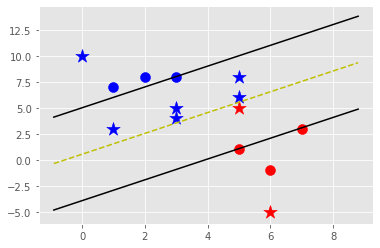

In [71]:
data_dict = {-1:np.array([[1, 7],
                          [2, 8],
                          [3, 8],]),
             1:np.array([[5, 1],
                        [6, -1],
                        [7, 3],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)

# predict sample data
# unsure why this doesn't work outside of this code block; can't seem to visualize again
predict_us = [[0, 10],
             [1, 3],
             [3, 4],
             [3, 5],
             [5, 5],
             [5, 6],
             [6, -5],
             [5, 8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()

In [72]:
svm.predict([5, 20])

-1.0